In [49]:
# Import necessary libraries for the task.
import torch  # Import PyTorch for deep learning.
import torch.nn as nn  # Import the neural network module from PyTorch.
import numpy as np  # Import NumPy for numerical operations.
import matplotlib.pyplot as plt  # Import Matplotlib for visualization.

# NEW!
from sklearn.model_selection import train_test_split  # Import train_test_split from Scikit-Learn.


In [50]:
# Load the Iris dataset using Seaborn.
import seaborn as sns
iris_data = sns.load_dataset('iris')

# Convert the dataset from a pandas dataframe to a PyTorch tensor.
data = torch.tensor(iris_data[iris_data.columns[0:4]].values).float()

# Transform the species labels into numerical values.
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris_data.species == 'versicolor'] = 1
labels[iris_data.species == 'virginica'] = 2


# A brief aside on using train_test_split

In [51]:
# Create a fake dataset for demonstration purposes.
fake_data = np.tile(np.array([1, 2, 3, 4]), (10, 1)) + np.tile(10 * np.arange(1, 11), (4, 1)).T
fake_labels = np.arange(10) > 4
print(fake_data), print(' ')
print(fake_labels)


[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]
 
[False False False False False  True  True  True  True  True]


In [52]:
# Use Scikit-Learn to split the fake data into training and test sets.
train_data, test_data, train_labels, test_labels = \
    train_test_split(fake_data, fake_labels, test_size=0.2, random_state=33)

# Print out the sizes of the training and test sets.
print('Training data size: ' + str(train_data.shape))
print('Test data size: ' + str(test_data.shape))
print(' ')

# Print out the training and test data.
print('Training data: ')
print(train_data)
print(' ')

print('Test data: ')
print(test_data)


Training data size: (8, 4)
Test data size: (2, 4)
 
Training data: 
[[ 61  62  63  64]
 [101 102 103 104]
 [ 21  22  23  24]
 [ 71  72  73  74]
 [ 31  32  33  34]
 [ 11  12  13  14]
 [ 81  82  83  84]
 [ 51  52  53  54]]
 
Test data: 
[[91 92 93 94]
 [41 42 43 44]]


# Now back to the model

In [53]:
# Define a function to create a new ANN model.
def create_a_new_model():

    # Model architecture.
    custom_ann_model = nn.Sequential(
        nn.Linear(4, 64),   # Input layer
        nn.ReLU(),          # ReLU activation
        nn.Linear(64, 64),  # Hidden layer
        nn.ReLU(),          # ReLU activation
        nn.Linear(64, 3)    # Output layer
    )

    # Loss function.
    loss_function = nn.CrossEntropyLoss()

    # Optimizer.
    optimizer = torch.optim.SGD(custom_ann_model.parameters(), lr=0.001)

    return custom_ann_model, loss_function, optimizer


In [54]:
# Global parameter: Number of epochs.
num_epochs = 1000

# Define a function to train the model.
def train_the_model(train_prop):

    # Initialize losses, training accuracy, and test accuracy.
    losses = torch.zeros(num_epochs)
    train_accuracy = []
    test_accuracy = []

    # Loop over epochs.
    for epoch_idx in range(num_epochs):

        # Separate training and test data for each epoch.
        X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=train_prop)

        # Forward pass and loss.
        y_hat = ANNiris(X_train)
        loss = loss_function(y_hat, y_train)

        # Backpropagation.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Compute training accuracy.
        train_accuracy.append(100 * torch.mean((torch.argmax(y_hat, axis=1) == y_train).float()).item())

        # Test accuracy.
        pred_labels = torch.argmax(ANNiris(X_test), axis=1)
        test_accuracy.append(100 * torch.mean((pred_labels == y_test).float()).item())

    # Function output.
    return train_accuracy, test_accuracy


# Test the model by running it once

In [55]:
# Create a new ANN model.
ANNiris, loss_function, optimizer = create_a_new_model()

# Train the model.
# NOTE: The input is the training proportion, not the test proportion!
train_accuracy, test_accuracy = train_the_model(0.8)


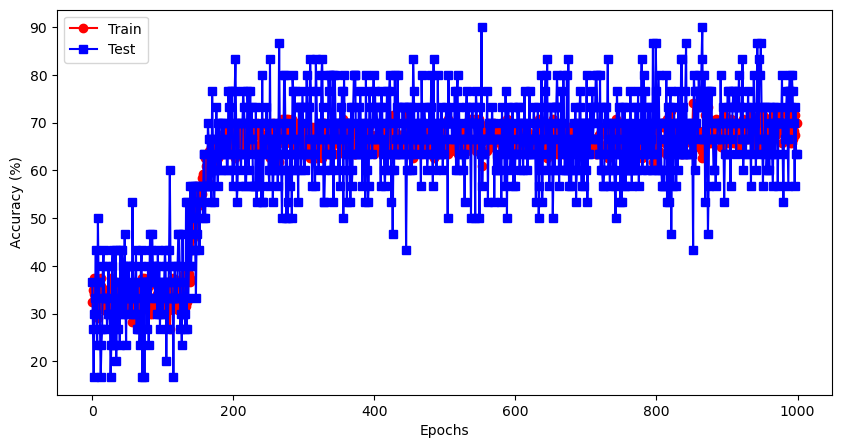

In [56]:
# Plot the results.
fig = plt.figure(figsize=(10, 5))

plt.plot(train_accuracy, 'ro-')
plt.plot(test_accuracy, 'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train', 'Test'])
plt.show()


# Now for the experiment

In [57]:
# Define an array of training set proportions to test.
train_set_sizes = np.linspace(0.2, 0.95, 10)

# Initialize arrays to store training and test accuracies for each training set size.
all_train_accuracy = np.zeros((len(train_set_sizes), num_epochs))
all_test_accuracy = np.zeros((len(train_set_sizes), num_epochs))

# Loop over training set sizes.
for i in range(len(train_set_sizes)):

    # Create a new ANN model.
    ANNiris, loss_function, optimizer = create_a_new_model()

    # Train the model.
    train_accuracy, test_accuracy = train_the_model(train_set_sizes[i])

    # Store the results.
    all_train_accuracy[i, :] = train_accuracy
    all_test_accuracy[i, :] = test_accuracy


Text(0.5, 1.0, 'testing accuracy')

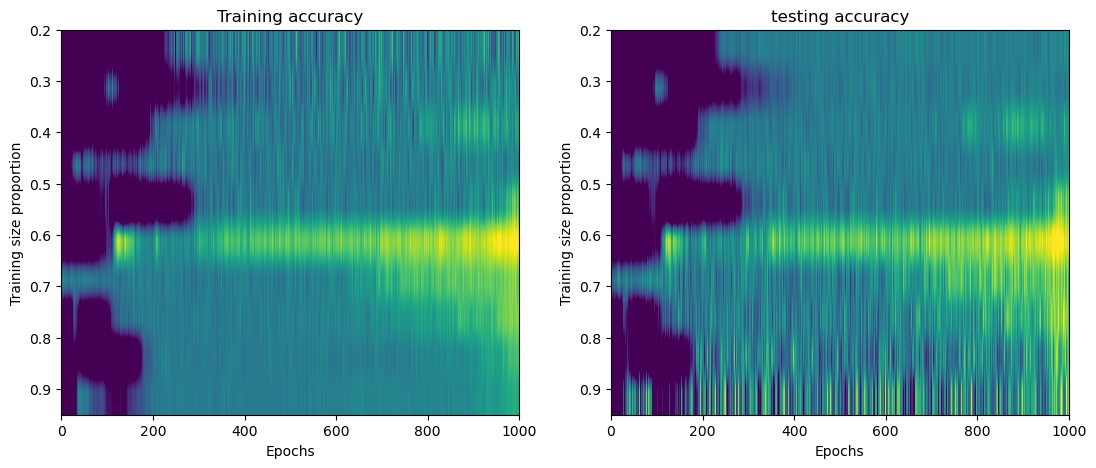

In [58]:
# Create subplots for training and test accuracy heatmaps.
fig, ax = plt.subplots(1, 2, figsize=(13, 5))

# Plot the training accuracy heatmap.
ax[0].imshow(all_train_accuracy, aspect='auto',
             vmin=50, vmax=90, extent=[0, num_epochs, train_set_sizes[-1], train_set_sizes[0]])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training size proportion')
ax[0].set_title('Training accuracy')

# Plot the test accuracy heatmap.
ax[1].imshow(all_test_accuracy, aspect='auto',
             vmin=50, vmax=90, extent=[0, num_epochs, train_set_sizes[-1], train_set_sizes[0]])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training size proportion')
ax[1].set_title('testing accuracy')

In [59]:
print(all_train_accuracy.shape)
all_train_accuracy

(10, 1000)


array([[26.66666806, 43.33333373, 30.00000119, ..., 76.66666508,
        69.99999881, 83.33333135],
       [38.0952388 , 38.0952388 , 38.0952388 , ..., 66.66666865,
        71.42857313, 69.04761791],
       [38.18181753, 29.09090817, 32.72727132, ..., 72.72727489,
        74.54545498, 76.36363506],
       ...,
       [35.04273593, 33.33333433, 35.04273593, ..., 82.90598392,
        83.76068473, 83.76068473],
       [33.84615481, 32.30769336, 34.61538553, ..., 76.9230783 ,
        78.46153975, 76.9230783 ],
       [33.09859037, 34.50704217, 33.80281627, ..., 73.23943377,
        74.64788556, 73.94366264]])

# Additional explorations

In [60]:
# 1) The images above suggest that the training proportion doesn't really affect learning success (for this data and this
#    model). Does increasing the number of epochs to 1000 change the conclusion? How about with a lr=.001?
# 
# 2) According to the help doc for train_test_split(), the train_size input can be either a float between 0.0 and 1.0, or
#    an int. Here we only used float inputs to indicate the proportion of the data used for training. Modify the code to
#    specify the training size as an integer corresponding to the number of samples.
# 